In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
data = pd.read_csv('Heart_Attack_Data_Set.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# correlation = data.corr()
# correlation
# #heatmap
# plt.figure(figsize=(11,7))
# sns.heatmap(correlation, cmap="Blues", annot=True)

In [ ]:
data.shape

(303, 14)

In [ ]:
data.isnull().values.any() #IF there any null value reture True otherwise false

False

# **EDA**

In [ ]:
# gender_variable = 'sex'

# # Calculate the number of male patients
# male_patients = data[data[gender_variable] == 1].shape[0]
# female_patients = data[data[gender_variable] == 0].shape[0]
# print(f'Number of male patients: {male_patients}')
# print(f'Number of female patients: {female_patients}')


# target_variable = 'target'
# healthy_patients = data[data[target_variable] == 0].shape[0]
# print(f'Number of healthy patients: {healthy_patients}')
# disease = 303 - healthy_patients
# print(f'Number of unhealhty: {disease}')



# # Calculate the number of male healthy patients
# male_healthy_patients = data[(data[target_variable] == 0) & (data[gender_variable] == 1)].shape[0]
# print(f'Number of male healthy patients: {male_healthy_patients}')

# # Calculate the number of female healthy patients
# female_healthy_patients = data[(data[target_variable] == 0) & (data[gender_variable] == 0)].shape[0]
# print(f'Number of female healthy patients: {female_healthy_patients}')


# # Unhealthy patient male
# male_unhealthy_patients = data[(data[target_variable] == 1) & (data[gender_variable] == 1)].shape[0]
# print(f'Male unhealthy patients: {male_unhealthy_patients}')


# # Calculate the number of female unhealthy patients
# female_unhealthy_patients = data[(data[target_variable] == 1) & (data[gender_variable] == 0)].shape[0]
# print(f'Female unhealthy patients: {female_unhealthy_patients}')

In [ ]:
# target_variable = 'target'

# # Assuming the gender variable is named 'gender' where 1 represents male
# gender_variable = 'sex'

# # Create a count plot to visualize the distribution of individuals with and without heart disease based on gender
# plt.figure(figsize=(7.5, 5.8))
# sns.countplot(x=gender_variable, hue=target_variable, data=data, palette='inferno')
# plt.xlabel('Target Attribute: Gender (1: Male, 0: Female)')
# plt.ylabel('Count')
# plt.legend( labels=['No Heart Disease', 'Heart Disease'])
# plt.show()

In [ ]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
X=data.drop(columns='target',axis=1)
Y=data['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# X_train

print(X.shape,X_train.shape,X_test.shape)

(303, 13) (272, 13) (31, 13)


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# **LR**

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression(max_iter=1000)
model= GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
model.fit(X_train,Y_train)
ans=model.predict(X_train)
anss=model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [ ]:
accuracy_test_lr=accuracy_score(anss,Y_test)
precision_test_lr=precision_score(anss,Y_test)
recall_test_lr=recall_score(anss,Y_test)
f1_test_lr=f1_score(Y_test,anss)

print("Testing Accuracy is ",accuracy_test_lr)
print("Testing Precision is ",precision_test_lr)
print("Testing recall is ",recall_test_lr)
print("Testing F1 is ",f1_test_lr)
print("LR Confusion Matrix:",confusion_matrix(anss,Y_test))

y_pred_prob_lr = model.predict_proba(X_test)[:, 1]
auc_roc_LR = roc_auc_score(Y_test, y_pred_prob_lr)
print(f'LR AUC: {auc_roc_LR}')

Testing Accuracy is  0.9032258064516129
Testing Precision is  0.8823529411764706
Testing recall is  0.9375
Testing F1 is  0.9090909090909091
LR Confusion Matrix: [[13  2]
 [ 1 15]]
LR AUC: 0.953781512605042


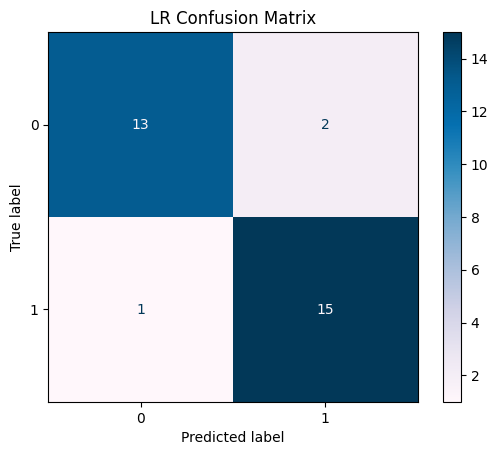

In [ ]:
#confusion matrix using matplotlib
lr_cm = confusion_matrix(anss,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=model.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('LR Confusion Matrix')
plt.show()

# **XGBoost**

In [ ]:
model2=model = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0)
model2.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
acc22 = model2.predict(X_test)

accuracy_xgb_test=accuracy_score(acc22,Y_test)
precision_xgb_test=precision_score(acc22,Y_test)
recall_xgb_test=recall_score(acc22,Y_test)
f1_xgb_test=f1_score(acc22,Y_test)

print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precision is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)
print("xgb Confusion Matrix:",confusion_matrix(acc22,Y_test))

y_pred_prob_xgb = model2.predict_proba(X_test)[:, 1]
auc_roc_xgb = roc_auc_score(Y_test, y_pred_prob_xgb)
print(f'XGB AUC: {auc_roc_xgb}')

Testing Accuracy is  0.8709677419354839
Testing Precision is  0.8823529411764706
Testing recall is  0.8823529411764706
Testing F1 is  0.8823529411764706
xgb Confusion Matrix: [[12  2]
 [ 2 15]]
XGB AUC: 0.9453781512605042


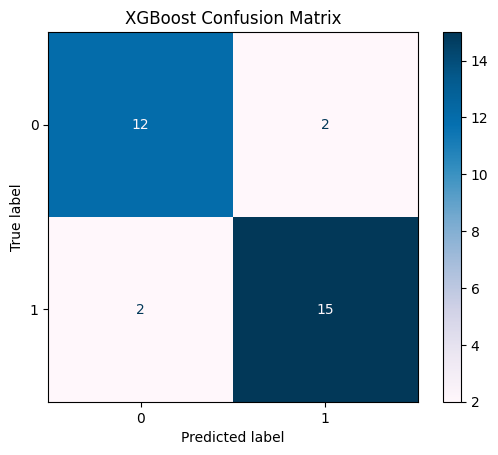

In [ ]:
#confusion matrix using matplotlib
xgb_cm = confusion_matrix(acc22,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=model2.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('XGBoost Confusion Matrix')
plt.show()

# **MLP**

In [ ]:
model3 = MLPClassifier(hidden_layer_sizes=(50,),random_state=1)
model3.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

In [ ]:
y_pred_t = model3.predict(X_test)

acc_mlp_t  = accuracy_score(y_pred_t,Y_test)
precision_mlp_t=precision_score(y_pred_t,Y_test)
recall_mlp_t=recall_score(y_pred_t,Y_test)
f1_mlp_t=f1_score(y_pred_t,Y_test)
mlp_cm = confusion_matrix(y_pred_t,Y_test)

print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precision is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)
print("MLP Confusion Matrix",mlp_cm)

# MLP
y_prob_mlp = model3.predict_proba(X_test)[:, 1]
mlp_fpr, mlp_tpr, thresholds = roc_curve(Y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(Y_test, y_prob_mlp)
print(f'XGB AUC: {roc_auc_mlp}')

Testing Accuracy is  0.9354838709677419
Testing Precision is  0.8823529411764706
Testing recall is  1.0
Testing F1 is  0.9375
MLP Confusion Matrix [[14  2]
 [ 0 15]]
XGB AUC: 0.9705882352941176


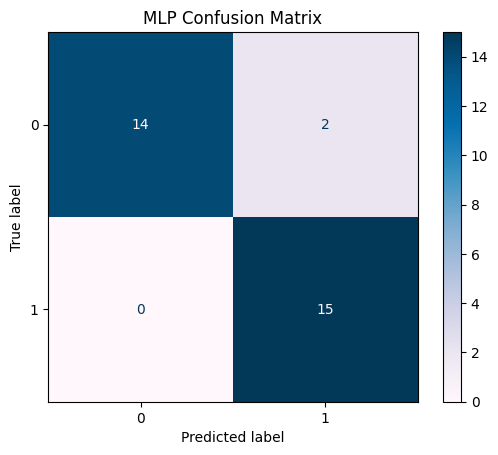

In [ ]:
#confusion matrix using matplotlib
mlp_cm = confusion_matrix(y_pred_t,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=model3.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('MLP Confusion Matrix')
plt.show()

# **RF**

In [ ]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,Y_train)
rf_pred = rf_clf.predict(X_test)

In [ ]:
print("Random Forest Accuracy:",accuracy_score(Y_test,rf_pred))
print("Random Forest Precision:",precision_score(Y_test,rf_pred))
print("Random Forest Recall:",recall_score(Y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(Y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(Y_test,rf_pred))

Random Forest Accuracy: 0.9354838709677419
Random Forest Precision: 1.0
Random Forest Recall: 0.8823529411764706
Random Forest F1 Score: 0.9375
Random Forest Confusion Matrix: [[14  0]
 [ 2 15]]


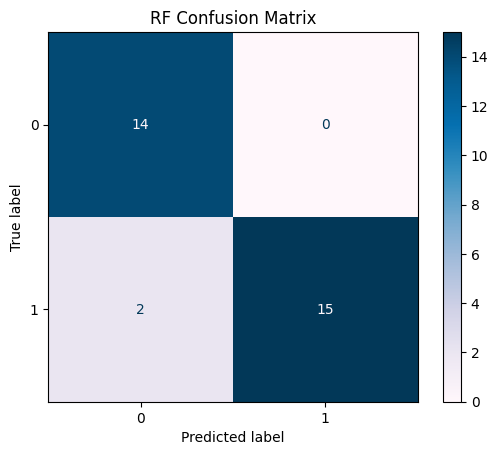

In [ ]:
#confusion matrix using matplotlib
rf_cm = confusion_matrix(Y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('RF Confusion Matrix')
plt.show()

## DT

In [ ]:
"""**Decison Tree**"""

dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(X_train,Y_train)
dc_pred = dc_clf.predict(X_test)

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(Y_test,dc_pred))
print("Decision Tree Precision:",precision_score(Y_test,dc_pred))
print("Decision Tree Recall:",recall_score(Y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(Y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(Y_test,dc_pred))

Decision Tree Accuracy: 0.8064516129032258
Decision Tree Precision: 0.8666666666666667
Decision Tree Recall: 0.7647058823529411
Decision Tree F1 Score: 0.8125
Decision Tree Confusion Matrix: [[12  2]
 [ 4 13]]


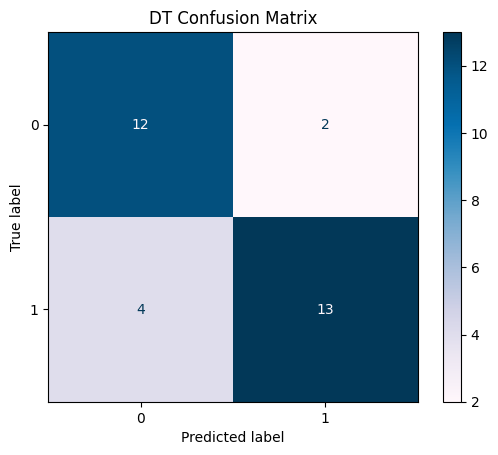

In [ ]:
#confusion matrix using matplotlib
dc_cm = confusion_matrix(Y_test,dc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dc_cm, display_labels=dc_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('DT Confusion Matrix')
plt.show()

## NB

In [ ]:
"""**Naive Bayes**"""

nb_clf = GaussianNB()
nb_clf.fit(X_train,Y_train)
nb_pred_22= nb_clf.predict(X_test)

In [ ]:
print("Naive Bayes Accuracy:",accuracy_score(Y_test,nb_pred_22))
print("Naive Bayes Precision:",precision_score(Y_test,nb_pred_22))
print("Naive Bayes Recall:",recall_score(Y_test,nb_pred_22))
print("Naive Bayes F1 Score:",f1_score(Y_test,nb_pred_22))
print("Naive Bayes Confusion Matrix:",confusion_matrix(Y_test,nb_pred_22))

Naive Bayes Accuracy: 0.8387096774193549
Naive Bayes Precision: 0.875
Naive Bayes Recall: 0.8235294117647058
Naive Bayes F1 Score: 0.8484848484848485
Naive Bayes Confusion Matrix: [[12  2]
 [ 3 14]]


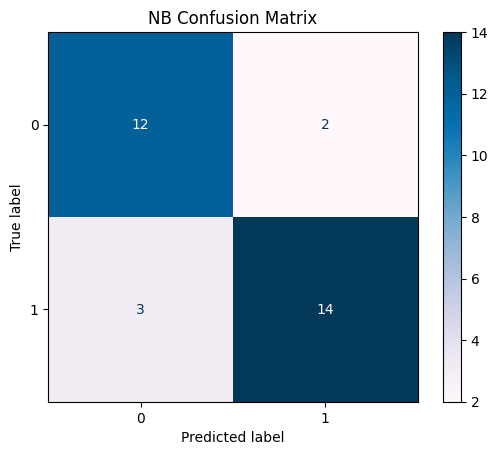

In [ ]:
#confusion matrix using matplotlib
nb_cm = confusion_matrix(Y_test,nb_pred_22)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

## SVM

In [ ]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2, probability=True)
classifier.fit(X_train,Y_train)
Y_predict = classifier.predict(X_test)

In [ ]:
# y_pred_prob_svm = classifier.predict_proba(X_test)[:, 1]
# auc_roc_svm = roc_auc_score(Y_test, y_pred_prob_svm)
# print(f'SVM AUC: {auc_roc_svm}')

In [ ]:
print("svm Accuracy:", accuracy_score(Y_test,Y_predict))
print("svm Precision:",precision_score(Y_test,Y_predict))
print("svm Recall:",recall_score(Y_test,Y_predict))
print("svm F1 Score:",f1_score(Y_test,Y_predict))

svm Accuracy: 0.9032258064516129
svm Precision: 0.9375
svm Recall: 0.8823529411764706
svm F1 Score: 0.9090909090909091


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(Y_test,Y_predict)
svm_cm

array([[13,  1],
       [ 2, 15]])

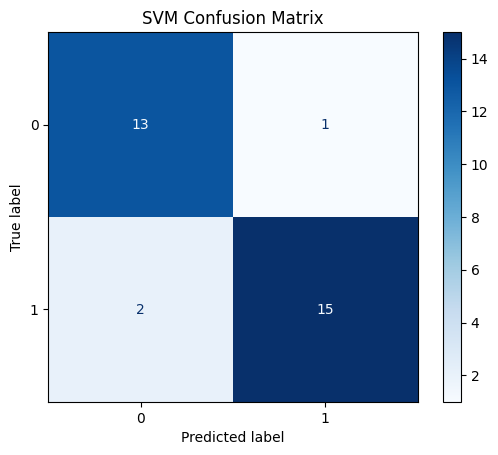

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM Confusion Matrix')
plt.show()

## KNN

In [ ]:
#When K = 5

#KNN MODEL building


# knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# knn_classifier = knn_classifier.fit(X_train,Y_train)

In [ ]:
#prediction

# Y_pred = knn_classifier.predict(X_test)

# print("KNN Accuracy:", accuracy_score(Y_test,Y_pred))
# print("KNN Precision:",precision_score(Y_test,Y_pred))
# print("KNN Recall:",recall_score(Y_test,Y_pred))
# print("KNN F1 Score:",f1_score(Y_test,Y_pred))

In [ ]:
#when k = 6

# knn_classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
# knn_classifier.fit(X_train,Y_train)

In [ ]:
#prediction
# Y_pred = knn_classifier.predict(X_test)

# print("KNN Accuracy:", accuracy_score(Y_test,Y_pred))
# print("KNN Precision:",precision_score(Y_test,Y_pred))
# print("KNN Recall:",recall_score(Y_test,Y_pred))
# print("KNN F1 Score:",f1_score(Y_test,Y_pred))

In [ ]:
# When k= 7

knn_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train,Y_train)
#prediction
Y_pred = knn_classifier.predict(X_test)

In [ ]:
y_pred_prob_knn = knn_classifier.predict_proba(X_test)[:, 1]
auc_roc_knn = roc_auc_score(Y_test, y_pred_prob_knn)
print(f'KNN AUC: {auc_roc_knn}')

KNN AUC: 0.9096638655462185


In [ ]:
print("KNN Accuracy:", accuracy_score(Y_test,Y_pred))
print("KNN Precision:",precision_score(Y_test,Y_pred))
print("KNN Recall:",recall_score(Y_test,Y_pred))
print("KNN F1 Score:",f1_score(Y_test,Y_pred))

KNN Accuracy: 0.8387096774193549
KNN Precision: 0.8333333333333334
KNN Recall: 0.8823529411764706
KNN F1 Score: 0.8571428571428571


In [ ]:
knn_cm = confusion_matrix(Y_test,Y_pred)
knn_cm

array([[11,  3],
       [ 2, 15]])

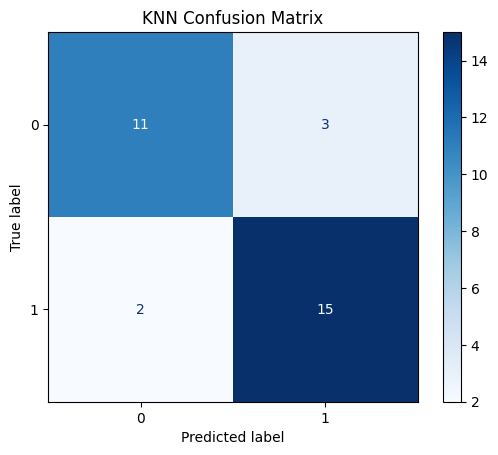

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('KNN Confusion Matrix')
plt.show()

In [ ]:
#When k= 8

# knn_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
# knn_classifier.fit(X_train,Y_train)

In [ ]:
# #prediction
# Y_pred = knn_classifier.predict(X_test)

# #check accuracy

# print("KNN Accuracy:", accuracy_score(Y_test,Y_pred))
# print("KNN Precision:",precision_score(Y_test,Y_pred))
# print("KNN Recall:",recall_score(Y_test,Y_pred))
# print("KNN F1 Score:",f1_score(Y_test,Y_pred))

In [ ]:
#When k = 9


# knn_classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
# knn_classifier.fit(X_train,Y_train)

In [ ]:
# #prediction
# Y_pred = knn_classifier.predict(X_test)

# print("KNN Accuracy:", accuracy_score(Y_test,Y_pred))
# print("KNN Precision:",precision_score(Y_test,Y_pred))
# print("KNN Recall:",recall_score(Y_test,Y_pred))
# print("KNN F1 Score:",f1_score(Y_test,Y_pred))

In [ ]:
# cm = confusion_matrix(Y_test,Y_pred)
# cm

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
# disp.plot(cmap='Blues', values_format='d')
# plt.title('Confusion Matrix')
# plt.show()

## **GB**

In [ ]:
# Create the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=2)

# Train the classifier on the training data
gb_classifier.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=2)

In [ ]:
# y_pred_prob_gb = gb_classifier.predict_proba(X_test)[:, 1]
# auc_roc_gb = roc_auc_score(Y_test, y_pred_prob_gb)
# print(f'GB AUC: {auc_roc_gb}')

In [ ]:
Y_pred2 = gb_classifier.predict(X_test)
print("GB Accuracy:", accuracy_score(Y_test,Y_pred2))
print("GB Precision:",precision_score(Y_test,Y_pred2))
print("GB Recall:",recall_score(Y_test,Y_pred2))
print("GB F1 Score:",f1_score(Y_test,Y_pred2))
print("GB Confusion Matrix:", confusion_matrix(Y_test,Y_pred2))

GB Accuracy: 0.7741935483870968
GB Precision: 0.9166666666666666
GB Recall: 0.6470588235294118
GB F1 Score: 0.7586206896551724
GB Confusion Matrix: [[13  1]
 [ 6 11]]


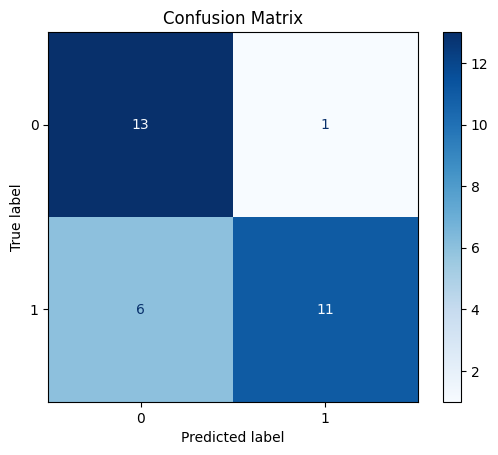

In [ ]:
#confusion matrix

cm = confusion_matrix(Y_test,Y_pred2)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
final_data = pd.DataFrame({'Models':['LR','RF','NB','DT','SVM','KNN','GB','MLP','XGB'],'ACC':[
     accuracy_score(anss,Y_test),
      accuracy_score(Y_test,rf_pred),
       accuracy_score(Y_test,nb_pred_22),
        accuracy_score(Y_test,dc_pred),
     accuracy_score(Y_test,Y_predict),
     accuracy_score(Y_test,Y_pred),
     accuracy_score(Y_test,Y_pred2),
     accuracy_score(y_pred_t,Y_test),
     accuracy_score(acc22,Y_test)

                                                                                    ]})

In [ ]:
final_data

,Models,ACC
0,LR,0.903226
1,RF,0.935484
2,NB,0.838710
3,DT,0.806452
4,SVM,0.903226
5,KNN,0.838710
6,GB,0.774194
7,MLP,0.935484
8,XGB,0.870968


In [ ]:
# Plotting the bar chart using Seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8,4))
# sns.barplot(x='Models', y='ACC', data=final_data)
# plt.title('Model Accuracy Comparison', fontsize=16)
# plt.xlabel('9 Models', fontsize=16)
# plt.ylabel('Accuracy', fontsize=16)
# for index, row in final_data.iterrows():
#     plt.text(index, row['ACC'] + 0.01, f'{row["ACC"]*100:.2f}', ha='center', fontsize=12)
# plt.show()

# **AUC ROC Curve**

In [ ]:
#ROC
# LR
# y_prob_lr = model.predict_proba(X_test)[:, 1]
# lr_fpr, lr_tpr, thresholds = roc_curve(Y_test, y_prob_lr)
# roc_auc_lr = roc_auc_score(Y_test, y_pred_prob_lr)

# # XGBoost
# y_prob_xgb = model2.predict_proba(X_test)[:, 1]
# xgb_fpr, xgb_tpr, thresholds = roc_curve(Y_test, y_prob_xgb)
# roc_auc_xgb = roc_auc_score(Y_test, y_prob_xgb)

# # RF
# y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
# rf_fpr, rf_tpr, thresholds = roc_curve(Y_test, y_prob_rf)
# roc_auc_rf = auc(rf_fpr, rf_tpr)

# # DT
# y_prob_dt = dc_clf.predict_proba(X_test)[:, 1]
# dt_fpr, dt_tpr, thresholds = roc_curve(Y_test, y_prob_dt)
# roc_auc_dt = roc_auc_score(Y_test, y_prob_dt)


# # NB
# y_prob_nb = nb_clf.predict_proba(X_test)[:, 1]
# nb_fpr, nb_tpr, thresholds = roc_curve(Y_test, y_prob_nb)
# roc_auc_nb = auc(nb_fpr, nb_tpr)

# # SVM
# y_prob_svm = classifier.predict_proba(X_test)[:, 1]
# svm_fpr, svm_tpr, thresholds = roc_curve(Y_test, y_prob_svm)
# roc_auc_svm = auc(svm_fpr, svm_tpr)

# # KNN
# y_prob_knn = knn_classifier.predict_proba(X_test)[:, 1]
# knn_fpr, knn_tpr, thresholds = roc_curve(Y_test, y_prob_knn)
# roc_auc_knn = auc(knn_fpr, knn_tpr)

# # GB
# y_prob_gb = gb_classifier.predict_proba(X_test)[:, 1]
# gb_fpr, gb_tpr, thresholds = roc_curve(Y_test, y_prob_gb)
# roc_auc_gb = auc(gb_fpr, gb_tpr)

# # MLP
# y_prob_mlp = model3.predict_proba(X_test)[:, 1]
# mlp_fpr, mlp_tpr, thresholds = roc_curve(Y_test, y_prob_mlp)
# roc_auc_mlp = roc_auc_score(Y_test, y_prob_mlp)

# plt.figure(figsize=(6, 4))
# plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.4f)' % roc_auc_lr)
# plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.4f)' % roc_auc_xgb)
# plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.4f)' % roc_auc_rf)
# plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.4f)' % roc_auc_dt)
# plt.plot(nb_fpr, nb_tpr, linestyle='-', label='NB (auc = %0.4f)' % roc_auc_nb)
# plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.4f)' % roc_auc_svm)
# plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.4f)' % roc_auc_knn)
# plt.plot(gb_fpr, gb_tpr, linestyle='-', label='GB (auc = %0.4f)' % roc_auc_gb)
# plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (auc = %0.4f)' % roc_auc_mlp)

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# # plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# print('LR AUC: {:.4f}'.format(roc_auc_lr))
# print('XGB AUC: {:.4f}'.format(roc_auc_xgb))
# print('RF AUC: {:.4f}'.format(roc_auc_rf))
# print('DT AUC: {:.4f}'.format(roc_auc_dt))
# print('NB AUC: {:.4f}'.format(roc_auc_nb))
# print('SVM AUC: {:.4f}'.format(roc_auc_svm))
# print('KNN AUC: {:.4f}'.format(roc_auc_knn))
# print('GB AUC: {:.4f}'.format(roc_auc_gb))
# print('MLP AUC: {:.4f}'.format(roc_auc_mlp))

# **RF**

In [ ]:
from sklearn.utils import resample

In [ ]:
n_bootstraps = 1000 # Number of bootstrap samples
accuracy = []

In [ ]:
for i in range(n_bootstraps):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(X_test, Y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_gb_bs =  rf_clf.predict(X_bootstrap)
    score_gb = accuracy_score(y_bootstrap, y_pred_gb_bs)
    accuracy.append(score_gb)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy)
std_score = np.std(accuracy)
conf_interval = np.percentile(accuracy, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps)

In [ ]:
print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

Mean Accuracy: 77.37%
Standard Deviation: 7.58%
95% Confidence Interval: [0.61, 0.90]
Standard Error: 0.0024


In [ ]:
# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Mean accuracy is 0.7737 with a 95% a confidence interval of [0.61,0.90]. And Standard Deviation: 0.0758


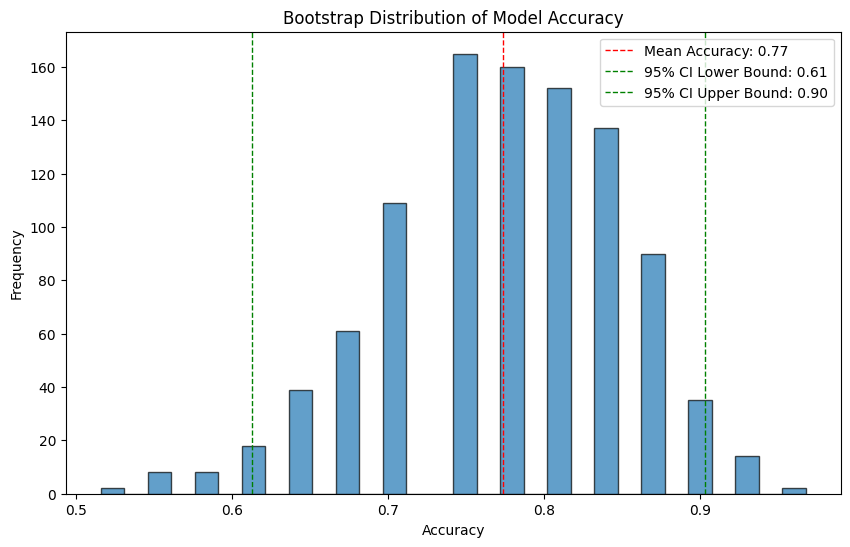

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(accuracy, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean_score, color='r', linestyle='dashed', linewidth=1, label=f'Mean Accuracy: {mean_score:.2f}')
plt.axvline(conf_interval[0], color='g', linestyle='dashed', linewidth=1, label=f'95% CI Lower Bound: {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='g', linestyle='dashed', linewidth=1, label=f'95% CI Upper Bound: {conf_interval[1]:.2f}')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Model Accuracy')
plt.legend()
plt.show()

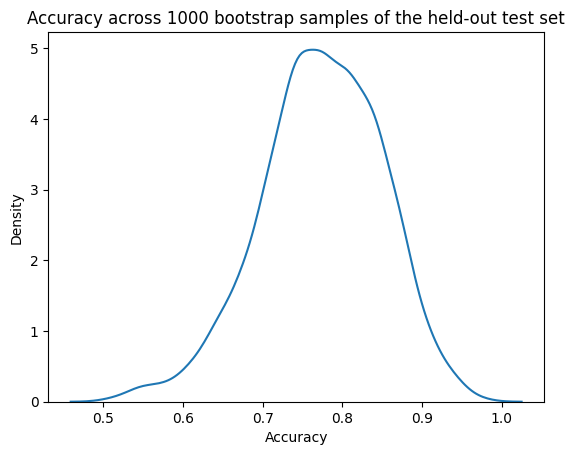

In [ ]:
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

In [ ]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence"
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.

Median accuracy is 0.77 with a 95% a confidenceinterval of [0.61,0.90].


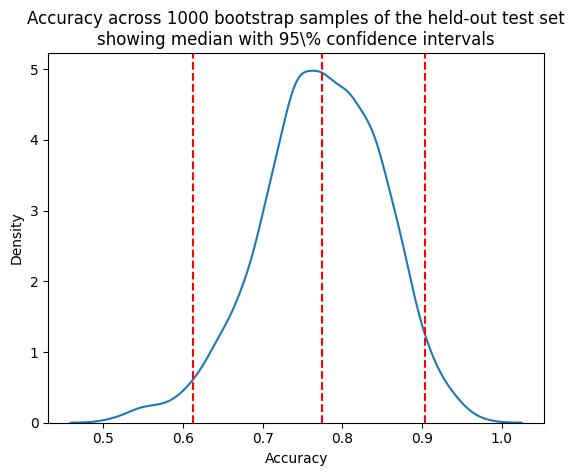

In [ ]:
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

# **DT**

In [ ]:
n_bootstraps_dt = 1000 # Number of bootstrap samples
accuracy_dt = []

for i in range(n_bootstraps_dt):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_dt =  dc_clf.predict(X_bootstrap)
    score_dt = accuracy_score(y_bootstrap, y_pred_dt)
    accuracy_dt.append(score_dt)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy_dt)
std_score = np.std(accuracy_dt, ddof=1)
conf_interval = np.percentile(accuracy_dt, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps_dt)

print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

print("\n")

# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_dt, alpha/2)
upper_ci = np.percentile(accuracy_dt, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

# **NB**

In [ ]:
n_bootstraps_nb = 1000 # Number of bootstrap samples
accuracy_nb = []

for i in range(n_bootstraps_nb):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_nb =  nb_clf.predict(X_bootstrap)
    score_nb = accuracy_score(y_bootstrap, y_pred_nb)
    accuracy_nb.append(score_nb)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy_nb)
std_score = np.std(accuracy_nb, ddof=1)
conf_interval = np.percentile(accuracy_nb, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps_nb)

print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

print("\n")

# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_nb, alpha/2)
upper_ci = np.percentile(accuracy_nb, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

# **LR**

In [ ]:
n_bootstraps_lr = 1000 # Number of bootstrap samples
accuracy_lr = []

for i in range(n_bootstraps_lr):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_lr =  model.predict(X_bootstrap)
    score_lr = accuracy_score(y_bootstrap, y_pred_lr)
    accuracy_lr.append(score_lr)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy_lr)
std_score = np.std(accuracy_lr, ddof=1)
conf_interval = np.percentile(accuracy_lr, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps_lr)

print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

print("\n")

# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_lr, alpha/2)
upper_ci = np.percentile(accuracy_lr, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

# **XGBoost**

In [ ]:
n_bootstraps_xgb = 1000 # Number of bootstrap samples
accuracy_xgb = []

for i in range(n_bootstraps_xgb):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_xgb =  model2.predict(X_bootstrap)
    score_xgb = accuracy_score(y_bootstrap, y_pred_xgb)
    accuracy_xgb.append(score_xgb)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy_xgb)
std_score = np.std(accuracy_xgb, ddof=1)
conf_interval = np.percentile(accuracy_xgb, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps_xgb)

print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

print("\n")

# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_xgb, alpha/2)
upper_ci = np.percentile(accuracy_xgb, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

# **MLP**

In [ ]:
n_bootstraps_mlp = 1000 # Number of bootstrap samples
accuracy_mlp = []

for i in range(n_bootstraps_mlp):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_mlp =  model3.predict(X_bootstrap)
    score_mlp = accuracy_score(y_bootstrap, y_pred_mlp)
    accuracy_mlp.append(score_mlp)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy_mlp)
std_score = np.std(accuracy_mlp, ddof=1)
conf_interval = np.percentile(accuracy_mlp, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps_mlp)

print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

print("\n")

# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_mlp, alpha/2)
upper_ci = np.percentile(accuracy_mlp, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

# **SVM**

In [ ]:
n_bootstraps_svm = 1000 # Number of bootstrap samples
accuracy_svm = []

for i in range(n_bootstraps_svm):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_svm =  classifier.predict(X_bootstrap)
    score_svm = accuracy_score(y_bootstrap, y_pred_svm)
    accuracy_svm.append(score_svm)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy_svm)
std_score = np.std(accuracy_svm, ddof=1)
conf_interval = np.percentile(accuracy_svm, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps_svm)

print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

print("\n")

# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_svm, alpha/2)
upper_ci = np.percentile(accuracy_svm, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

# **KNN**

In [ ]:
n_bootstraps_knn = 1000 # Number of bootstrap samples
accuracy_knn = []

for i in range(n_bootstraps_knn):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_knn =  knn_classifier.predict(X_bootstrap)
    score_knn = accuracy_score(y_bootstrap, y_pred_knn)
    accuracy_knn.append(score_knn)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy_knn)
std_score = np.std(accuracy_knn, ddof=1)
conf_interval = np.percentile(accuracy_knn, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps_knn)

print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

print("\n")

# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_knn, alpha/2)
upper_ci = np.percentile(accuracy_knn, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

# **GB**

In [ ]:
n_bootstraps_gb = 1000 # Number of bootstrap samples
accuracy_gb = []

for i in range(n_bootstraps_gb):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_gb =  gb_classifier.predict(X_bootstrap)
    score_gb = accuracy_score(y_bootstrap, y_pred_gb)
    accuracy_gb.append(score_gb)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy_gb)
std_score = np.std(accuracy_gb, ddof=1)
conf_interval = np.percentile(accuracy_gb, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps_gb)

print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

print("\n")

# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_gb, alpha/2)
upper_ci = np.percentile(accuracy_gb, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")